# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src='https://i.imgur.com/49FNOHj.jpg'>

# Important Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [ ]:
colors = pd.read_csv('data/colors.csv')
colors.head()
colors.tail()

,id,name,rgb,is_trans
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f
134,9999,[No Color],05131D,f


In [ ]:
colors['name'].nunique()

135

In [ ]:
colors['name'].count()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [ ]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [ ]:
colors.is_trans.value_counts()

,count
is_trans,
f,107
t,28


### **Understanding LEGO Themes vs. LEGO Sets**

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src= 'https://i.imgur.com/aKcwkSx.png'>

#### A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src='https://i.imgur.com/whB1olq.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows.

In [ ]:
sets = pd.read_csv('data/sets.csv')
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()
sets_by_year['set_num'].tail()

,set_num
year,
2017,786
2018,816
2019,840
2020,674
2021,3


In [ ]:
number_of_sets = sets_by_year.iloc[:-2]
number_of_sets.head()
number_of_sets.tail()
# sliced_sets.isna().values.any()

,set_num,name,theme_id,num_parts
year,,,,
2015,774,774,774,774
2016,757,757,757,757
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


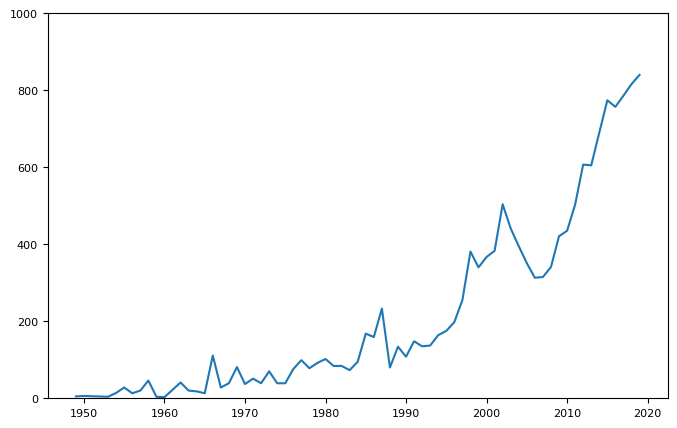

In [ ]:
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(0,1000)
plt.plot(number_of_sets.index , number_of_sets.set_num)

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [ ]:
release_year = number_of_sets.index[0] # first lego sets release year
print(f'The first LEGO sets was released in {release_year}')

# making a list of the lego sets on that year
sets_list = [row[1]['name'] for row in sets.iterrows() if row[1].year == release_year]

print('These sets were called:')
for set in sets_list:
    print(set)

The first LEGO sets was released in 1949
These sets were called:
Extra-Large Gift Set (ABB)
Large Gift Set (ABB)
Medium Gift Set (ABB)
Small Brick Set (ABB)
Small Doors and Windows Set (ABB)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
print(f'LEGO sold {len(sets_list)} sets in {release_year}')

LEGO sold 5 sets in 1949


**Challenge**: Find the top 5 LEGO sets with the most number of parts.

In [ ]:
num_parts = sets.sort_values('num_parts', ascending=False)
num_parts.head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [ ]:
print(f"In 1955, {sets_by_year.loc[1955]['set_num']} sets was released.")
print(f"In 2019, {sets_by_year.loc[2019]['set_num']} sets was released.")

In 1955, 28 sets was released.
In 2019, 840 sets was released.


### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [ ]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns={'theme_id' : 'nr_themes'}, inplace=True) # changes the 'theme_id' title to 'nr_themes'
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [ ]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

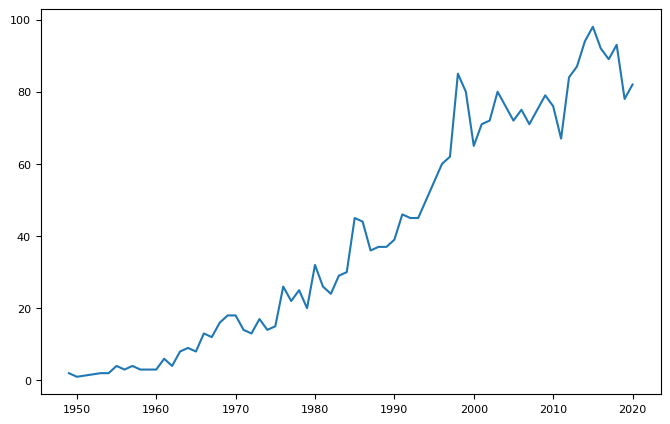

In [ ]:
number_of_themes = themes_by_year.iloc[:-1]
# clean_themes_by_year.tail()
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.plot(number_of_themes.index, number_of_themes.nr_themes)

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of Themes')

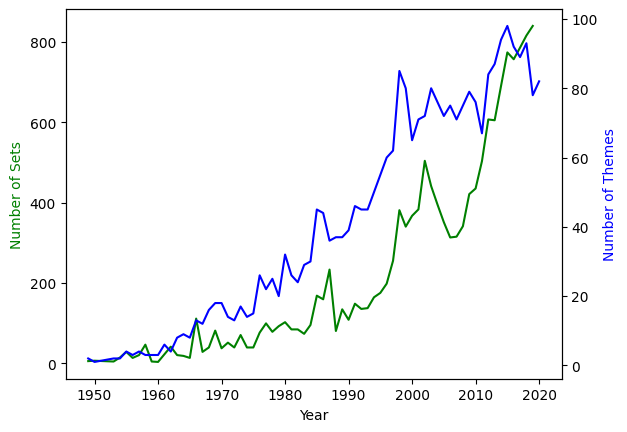

In [ ]:
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # creates another axis that shares the same x-axis

# ploting the line graph
ax1.plot(number_of_sets.index, number_of_sets.set_num, color='g')
ax2.plot(number_of_themes.index, number_of_themes.nr_themes, color='b')

# setting labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='g')
ax2.set_ylabel('Number of Themes', color='b')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [ ]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [ ]:
print(f'LEGO sets released in 1954 had an average of {parts_per_set.loc[1954]["num_parts"]} parts.')
print(f'LEGO sets released in 2017 had an average of {parts_per_set.loc[2017]["num_parts"]} parts.')

LEGO sets released in 1954 had an average of 12.357142857142858 parts.
LEGO sets released in 2017 had an average of 221.8409669211196 parts.


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

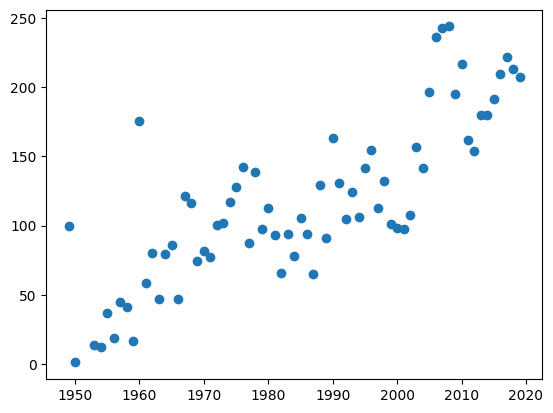

In [ ]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [ ]:
set_theme_count = sets['theme_id'].value_counts(ascending=False)
set_theme_count.head(10)

,count
theme_id,
158,753
501,656
494,398
435,356
503,329
505,328
497,310
632,299
371,273


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src='https://i.imgur.com/Sg4lcjx.png'>

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [ ]:
themes = pd.read_csv('data/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [ ]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [ ]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


In [ ]:
set_theme_count = pd.DataFrame(
    {
        'id': set_theme_count.index,
        'set_count': set_theme_count.values
    }
)
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [ ]:
set_theme_count.shape
themes.shape

(571, 2)

In [ ]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


####Creating Charts

<BarContainer object of 10 artists>

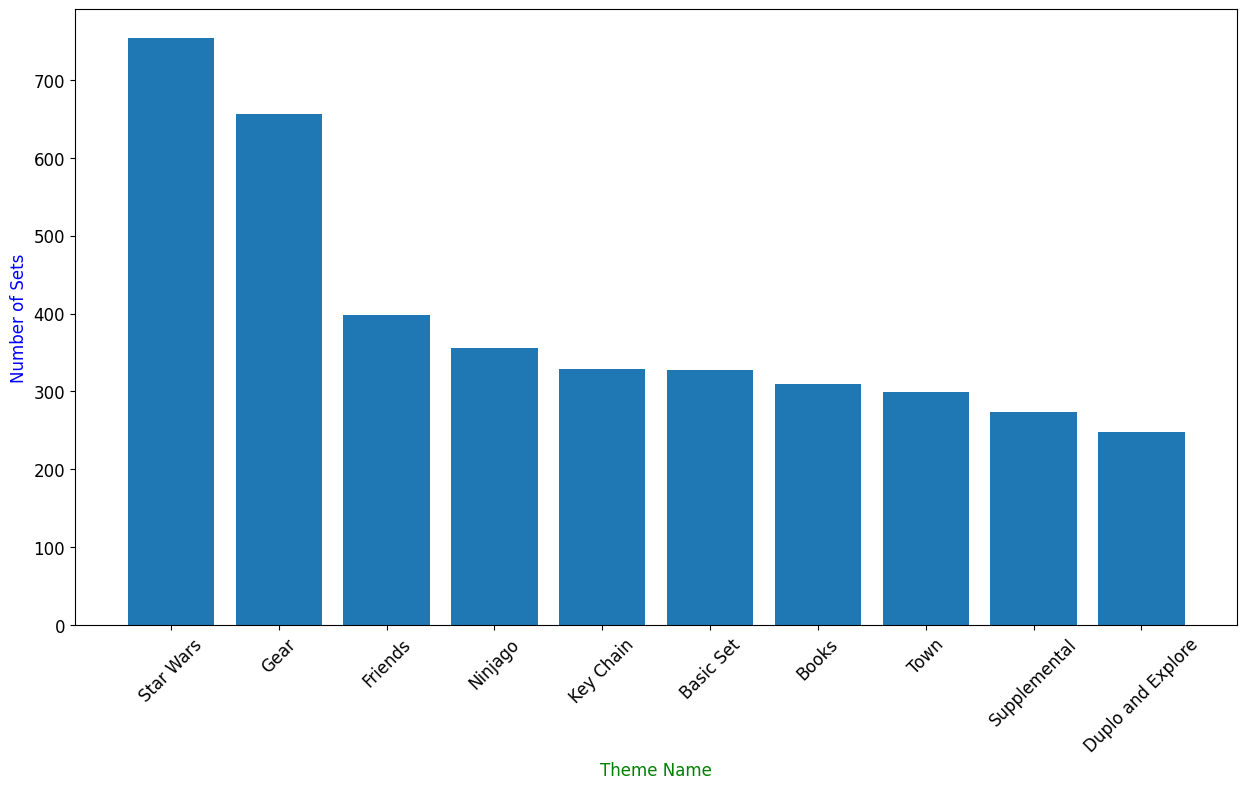

In [ ]:
plt.figure(figsize=(15, 8))
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Theme Name', fontsize=12, color='g')
plt.ylabel('Number of Sets', fontsize=12, color='b')


plt.bar(merged_df.name[:10], merged_df.set_count[:10])